### General Relativty describes the interaction between the geometry of spacetime and the energy-momentum of matter.

$G_{\mu\nu}$ + $\lambda g_{\mu\nu}$ = 8$\pi G T_{\mu\nu}$
 
Einstein's field equations are basically a set of coupled partial differential equations of components of the metric $g_{\mu\nu}$
. The metric defines the geometry of the space-time manifold.

On the left hand side we have the Einstein tensor $G_{\mu\nu}$ = $R_{\mu\nu}$ - 1/2 $g_{\mu\nu}$$R$ , where the Riemann tensor and Ricci scalar are complicated functions of the metric and its derivatives. Besides, we have $\lambda$ , which is a free constant parameter allowed by the theory, but which we now think is responsible for the accelerated expansion of the Universe.

The right hand side, with the tensor $T_{\mu\nu}$ 
 describes the energy and momentum of matter, a fluid, particles or the object in question (for example a star).

Youtube Video - https://www.youtube.com/watch?v=JRZgW1YjCKk (Stanford Lecture Series)

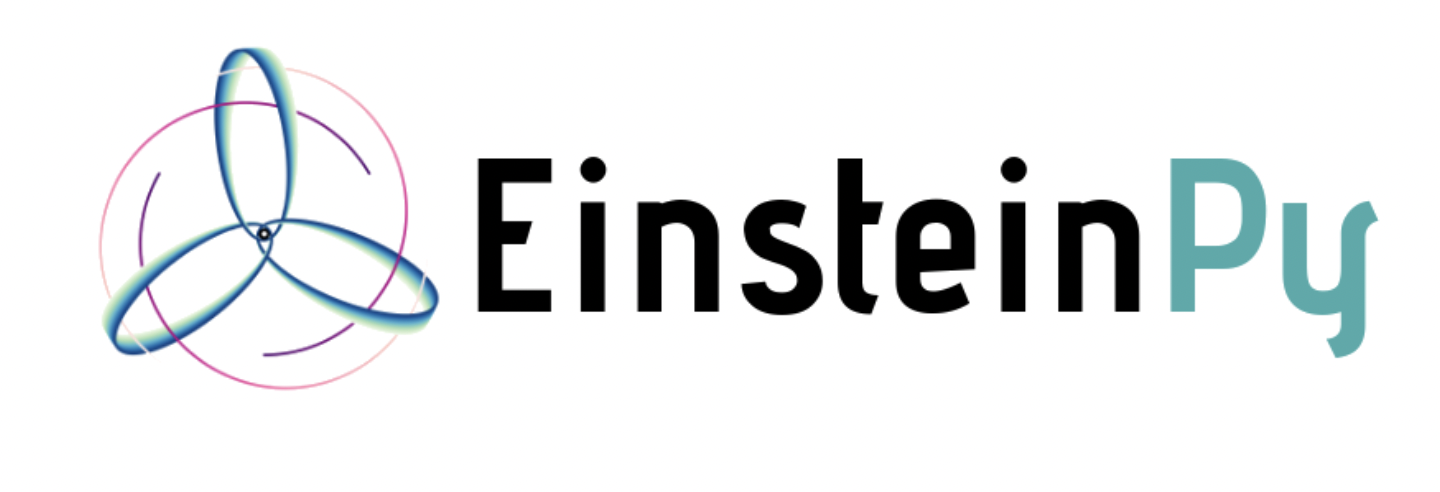

In [1]:
import numpy as np
import math

from astropy import units as u

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sympy
import sympy as smp
from sympy import symbols, Function, Eq, dsolve, simplify, sin, cos, sinh, sqrt, N, lambdify

# Einstein Py
import einsteinpy as ein
from einsteinpy.symbolic import ChristoffelSymbols, EinsteinTensor, MetricTensor, RicciTensor, Schwarzschild, RicciScalar
from einsteinpy.metric import *
from einsteinpy.geodesic import *
from einsteinpy.plotting import *
from einsteinpy.utils import *
from einsteinpy.symbolic.predefined import AntiDeSitter

### Some common tensors

In [2]:
metric = AntiDeSitter()
metric.tensor()

[[-1, 0, 0, 0], [0, cos(t)**2, 0, 0], [0, 0, cos(t)**2*sinh(chi)**2, 0], [0, 0, 0, sin(theta)**2*cos(t)**2*sinh(chi)**2]]

In [3]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

[[-3.0, 0, 0, 0], [0, 3.0*cos(t)**2, 0, 0], [0, 0, 3.0*cos(t)**2*sinh(chi)**2, 0], [0, 0, 0, 3.0*sin(theta)**2*cos(t)**2*sinh(chi)**2]]

In [4]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

[[3, 0, 0, 0], [0, -3*cos(t)**2, 0, 0], [0, 0, -3*cos(t)**2*sinh(chi)**2, 0], [0, 0, 0, -3*sin(theta)**2*cos(t)**2*sinh(chi)**2]]

In [5]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

-12

## Geodesics - Still trying to customize

Units:

- a = Angular Momentum (I believe 1 means spinning at c?, 0 = Schwarzschild)

- M units - what would momentum be?

In [6]:
position = [40., np.pi / 4, 0.] # Is spherical only in newest release?
momentum = [0., 0., 3.83405] # why this specific number?
a = 0.
steps = 5500
delta = 1.

In [7]:
geod = Timelike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=False
)
geod

Geodesic Object:(
            Type : (Time-like),
            Metric : (Kerr),
            Metric Parameters : ((0.0,)),
            Initial 4-Position : ([ 0.         40.          0.78539816  0.        ]),
            Initial 4-Momentum : ([-0.9835935  0.         0.         3.83405  ]),
            Trajectory = (
                (array([   0,    1,    2, ..., 5497, 5498, 5499]), array([[ 1.03536161e+00,  3.99999462e+01,  7.85401872e-01, ...,
        -1.87867522e-04,  1.83735073e-02,  3.83405000e+00],
       [ 2.07072346e+00,  3.99996139e+01,  7.85418856e-01, ...,
        -4.59792465e-04,  3.67499779e-02,  3.83405001e+00],
       [ 3.10608578e+00,  3.99991220e+01,  7.85449845e-01, ...,
        -5.89149367e-04,  5.51218921e-02,  3.83405001e+00],
       ...,
       [ 5.80132958e+03,  3.82422768e+01,  1.43360850e+00, ...,
        -2.79750970e-02, -3.79734171e+00,  3.83404998e+00],
       [ 5.80236747e+03,  3.82156203e+01,  1.43101299e+00, ...,
        -2.82050464e-02, -3.79591300e+00,  3.

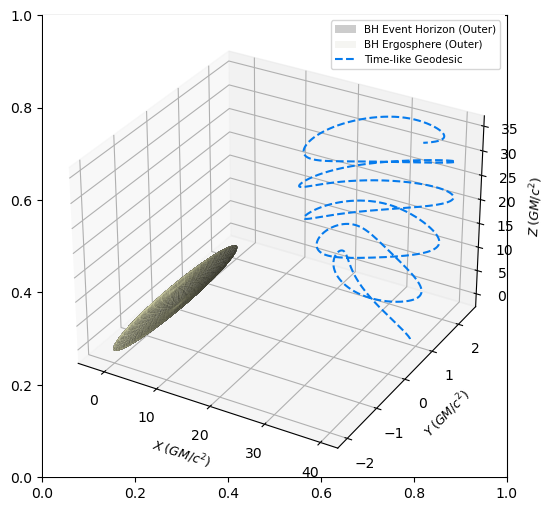

In [8]:
sgpl = StaticGeodesicPlotter()
sgpl.plot(geod)
sgpl.show()

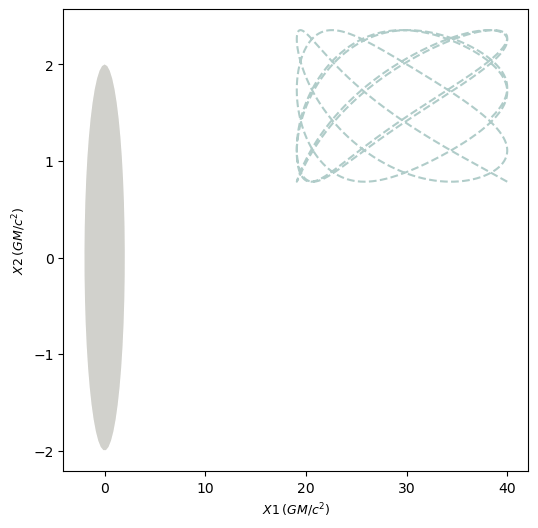

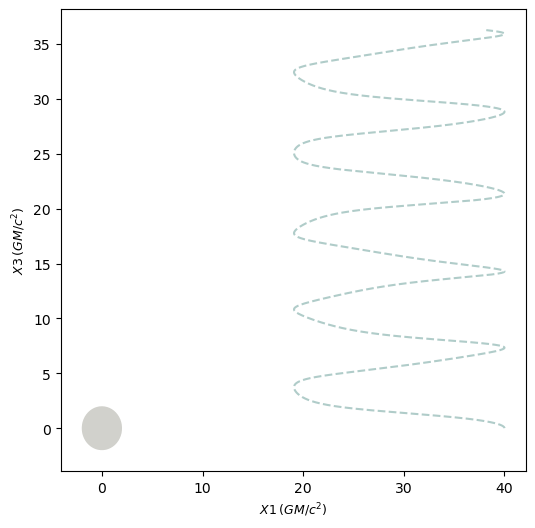

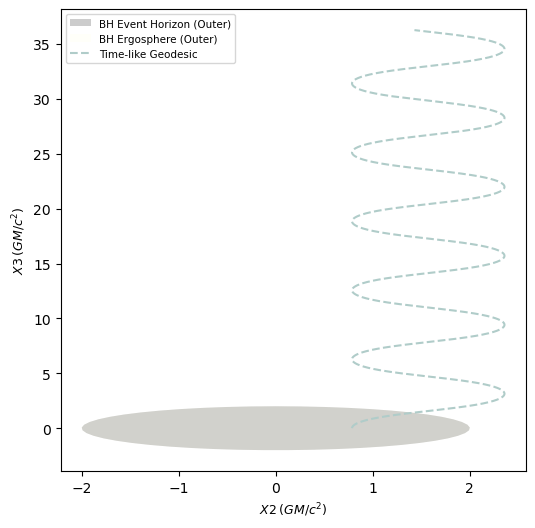

In [9]:
sgpl.plot2D(geod, coordinates=(1, 2)) # Plot X & Y
sgpl.plot2D(geod, coordinates=(1, 3)) # Plot X & Z
sgpl.plot2D(geod, coordinates=(2, 3)) # Plot Y & Z
sgpl.show()

## What is the Affine Parameter?

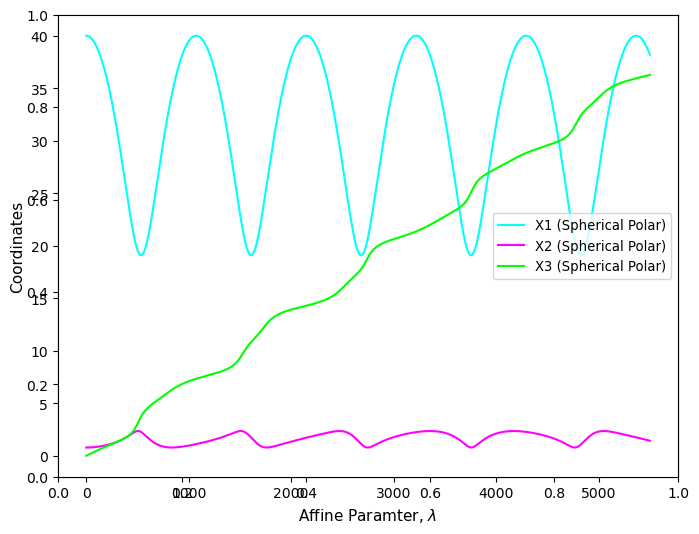

In [10]:
sgpl.parametric_plot(geod, colors=("cyan", "magenta", "lime")) # Plot X, Y, Z vs Lambda (Affine Parameter)
sgpl.show()

#### Let's calculate the behavior of the "scale factor" of the Universe, that the Einstein equations predict, for a homogeneous and isotropic Universe filled with a perfect fluid.

In [11]:
G_00, T_00, G, rho = smp.symbols("G_{00} T_{00} G rho")

In [12]:
rho

rho

In [13]:
einst_eq = smp.Eq( G_00, 8 * smp.pi * G * T_00 )
einst_eq

Eq(G_{00}, 8*pi*G*T_{00})

In [14]:
# The energy-momentum tensor of a perfect fluid:

energy_momentum = smp.Eq(T_00, rho)
energy_momentum

Eq(T_{00}, rho)

In [15]:
syms = smp.symbols("t x y z")
t, x, y, z = syms

In [16]:
a = smp.Function("a")  ##scale factor

__The line element of a homogeneous and isotropic Universe with no curvature. The metric elements are the coefficients in front of the coordinates.__
$ds^{2}$ = $g_{\mu\nu}$ $dx^{\mu}$ $dx^{\nu}$ = -$dt^{2}$ + $a^{2}(t)$($dx^{2}$+$dy^{2}$+$dz^{2}$)



In [17]:
from einsteinpy.symbolic import EinsteinTensor, MetricTensor
m = smp.diag(-1, a(t)**2, a(t)**2, a(t)** 2).tolist()
metric = MetricTensor(m, syms)

In [18]:
metric

MetricTensor[[-1, 0, 0, 0], [0, a(t)**2, 0, 0], [0, 0, a(t)**2, 0], [0, 0, 0, a(t)**2]]

In [19]:
metric.tensor()

[[-1, 0, 0, 0], [0, a(t)**2, 0, 0], [0, 0, a(t)**2, 0], [0, 0, 0, a(t)**2]]

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.simplify()

[[3.0*Derivative(a(t), t)**2/a(t)**2, 0, 0, 0], [0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0, 0], [0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0], [0, 0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2]]

In [21]:
H = smp.symbols("H")

Let's define a new function, that we will cull the Hubble function and it will be the relative "velocity" of expansion of $a(t)$:

$H(t)$ = $a^{o}$/$a$

In [22]:
smp.Eq( H, smp.diff(a(t), t)/a(t))

Eq(H, Derivative(a(t), t)/a(t))

In [23]:
G_00s = einst[0,0]
G_00s = G_00s.subs(smp.diff(a(t), t)/a(t), H)
G_00s

3.0*H**2

In [24]:
einst.tensor()

[[3.0*Derivative(a(t), t)**2/a(t)**2, 0, 0, 0], [0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0, 0], [0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0], [0, 0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2]]

In [25]:
einst_eq.subs(G_00, G_00s).subs(T_00, rho)

Eq(3.0*H**2, 8*pi*G*rho)

In [26]:
einst.tensor()/np.pi**2*a(t)**2

[[0.303963550927013*Derivative(a(t), t)**2, 0, 0, 0], [0, (-0.202642367284676*a(t)*Derivative(a(t), (t, 2)) - 0.101321183642338*Derivative(a(t), t)**2)*a(t)**2, 0, 0], [0, 0, (-0.202642367284676*a(t)*Derivative(a(t), (t, 2)) - 0.101321183642338*Derivative(a(t), t)**2)*a(t)**2, 0], [0, 0, 0, (-0.202642367284676*a(t)*Derivative(a(t), (t, 2)) - 0.101321183642338*Derivative(a(t), t)**2)*a(t)**2]]

### Spinning Black Hole Annimation

In [27]:
# Constant Radius Orbit
position1 = [4, np.pi / 3, 0.]
momentum1 = [0., 0.767851, 2.]
a1 = 0.99
steps1 = 400.
delta1 = 0.5

In [28]:
geod1 = Timelike(
    metric="Kerr",
    metric_params=(a1,),
    position=position1,
    momentum=momentum1,
    steps=steps1,
    delta=delta1,
    return_cartesian=True
)

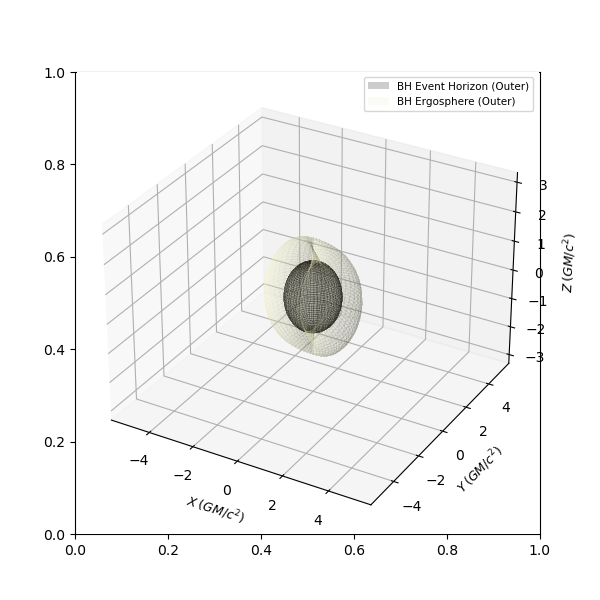

In [29]:
%matplotlib widget
# Use %matplotlib ipympl instead if you are working in Visual Studio Code.
# You may need to `pip install ipympl` first.
sgpl.clear()
sgpl = StaticGeodesicPlotter()
sgpl.animate(geod1, interval=1)
sgpl.show()